# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [16]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prade\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Read your api key environment variable
api_key = os.getenv("News_API_Key")
type(api_key)

str

In [20]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [21]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

In [22]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")

In [23]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Sentiment score DataFrame
btc_df = pd.DataFrame(btc_sentiments)


In [24]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
# Sentiment score DataFrame
eth_df = pd.DataFrame(eth_sentiments)

In [25]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.066950,0.044650,0.024250,0.931050
std,0.350287,0.062245,0.044307,0.062155
min,-0.680800,0.000000,0.000000,0.833000
25%,-0.045025,0.000000,0.000000,0.883500
50%,0.000000,0.000000,0.000000,0.930000
75%,0.476700,0.101750,0.046000,1.000000
max,0.571900,0.158000,0.167000,1.000000


In [26]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.228840,0.072750,0.016700,0.910500
std,0.327858,0.072257,0.030584,0.073421
min,-0.318200,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.847000
50%,0.102600,0.073000,0.000000,0.922000
75%,0.471750,0.095250,0.011250,0.967750
max,0.817600,0.221000,0.086000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin, score 0.051

Q: Which coin had the highest compound score?

A: Bitcoin, score 92%

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [27]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [28]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
# Complete the tokenizer function
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a list of the words
    words = word_tokenize(re_clean) 
    
    # Convert the words to lowercase
    lower = [word.lower() for word in words if word.lower() not in sw]
    
     # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens 

In [34]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937,"[A, similar, hoax, earlier, this, year, tied, ..."
1,"Earlier this year, Nothing released a pair of ...",2021-12-01,0.5106,0.099,0.000,0.901,"[Earlier, this, year, Nothing, released, a, pa..."
2,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",2021-11-22,0.0000,0.000,0.000,1.000,"[MIZATA, El, SalvadorLONDON, Nov, Reuters, El,..."
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847,"[In, keeping, with, a, previous, announcement,..."
4,Posted \r\nAfter becoming the first country to...,2021-11-22,0.4767,0.136,0.000,0.864,"[Posted, After, becoming, the, first, country,..."


In [35]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"If you claim ownership, someone will probably ...",2021-11-19,0.7783,0.216,0.000,0.784,"[If, you, claim, ownership, someone, will, pro..."
1,More than $1.2 million has already been spent ...,2021-11-24,0.0000,0.000,0.000,1.000,"[More, than, million, ha, already, been, spent..."
2,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847,"[In, keeping, with, a, previous, announcement,..."
3,Ethereum has been on a tear this year. Its out...,2021-11-23,0.6542,0.178,0.000,0.822,"[Ethereum, ha, been, on, a, tear, this, year, ..."
4,Blockchain startup MonoX Finance said on Wedne...,2021-12-02,-0.0516,0.074,0.079,0.847,"[Blockchain, startup, MonoX, Finance, said, on..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [36]:
from collections import Counter
from nltk import ngrams

In [38]:
# Generate the Bitcoin N-grams where N=2
btc_refined = tokenizer(str(btc_df['tokens']))

btc_bigram_counts = Counter(ngrams(btc_refined, n=2))
print(dict(btc_bigram_counts))

{('A', 'similar'): 1, ('similar', 'hoax'): 1, ('hoax', 'earlier'): 1, ('earlier', 'this'): 1, ('this', 'year'): 2, ('year', 'tied'): 1, ('tied', 'Earlier'): 1, ('Earlier', 'this'): 1, ('year', 'Nothing'): 1, ('Nothing', 'released'): 1, ('released', 'a'): 1, ('a', 'pa'): 1, ('pa', 'MIZATA'): 1, ('MIZATA', 'El'): 1, ('El', 'SalvadorLONDON'): 1, ('SalvadorLONDON', 'Nov'): 1, ('Nov', 'Reuters'): 1, ('Reuters', 'El'): 1, ('El', 'In'): 1, ('In', 'keeping'): 1, ('keeping', 'with'): 1, ('with', 'a'): 1, ('a', 'previous'): 1, ('previous', 'announcement'): 1, ('announcement', 'Posted'): 1, ('Posted', 'After'): 1, ('After', 'becoming'): 1, ('becoming', 'the'): 1, ('the', 'first'): 1, ('first', 'country'): 1, ('country', 'Available'): 1, ('Available', 'for'): 1, ('for', 'the'): 1, ('the', 'same'): 1, ('same', 'price'): 1, ('price', 'on'): 1, ('on', 'Decembe'): 1, ('Decembe', 'Spotify'): 1, ('Spotify', 'ha'): 1, ('ha', 'removed'): 1, ('removed', 'the'): 1, ('the', 'shuffle'): 1, ('shuffle', 'button

In [40]:
# Generate the Ethereum N-grams where N=2
eth_refined = tokenizer(str(eth_df['tokens']))

eth_bigram_counts = Counter(ngrams(eth_refined, n=2))
print(dict(eth_bigram_counts))

{('If', 'you'): 1, ('you', 'claim'): 1, ('claim', 'ownership'): 1, ('ownership', 'someone'): 1, ('someone', 'will'): 1, ('will', 'pro'): 1, ('pro', 'More'): 1, ('More', 'than'): 1, ('than', 'million'): 1, ('million', 'ha'): 1, ('ha', 'already'): 1, ('already', 'been'): 1, ('been', 'spent'): 1, ('spent', 'In'): 1, ('In', 'keeping'): 1, ('keeping', 'with'): 1, ('with', 'a'): 1, ('a', 'previous'): 1, ('previous', 'announcement'): 1, ('announcement', 'Ethereum'): 1, ('Ethereum', 'ha'): 1, ('ha', 'been'): 1, ('been', 'on'): 1, ('on', 'a'): 1, ('a', 'tear'): 1, ('tear', 'this'): 1, ('this', 'year'): 2, ('year', 'Blockchain'): 1, ('Blockchain', 'startup'): 1, ('startup', 'MonoX'): 1, ('MonoX', 'Finance'): 1, ('Finance', 'said'): 1, ('said', 'on'): 1, ('on', 'On'): 1, ('On', 'Monday'): 1, ('Monday', 'Budweiser'): 1, ('Budweiser', 'joined'): 1, ('joined', 'the'): 1, ('the', 'nonfungib'): 1, ('nonfungib', 'Earlier'): 1, ('Earlier', 'this'): 1, ('year', 'Nothing'): 1, ('Nothing', 'released'): 1, 

In [41]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [42]:
# Use token_count to get the top 10 words for Bitcoin
btc_bigram_counts.most_common(10)

[(('this', 'year'), 2),
 (('Dec', 'Reuters'), 2),
 (('Reuters', 'Bitcoin'), 2),
 (('to', 'at'), 2),
 (('at', 'GMT'), 2),
 (('Posted', 'Bitcoin'), 2),
 (('Bitcoin', 'shed'), 2),
 (('shed', 'a'), 2),
 (('a', 'fifth'), 2),
 (('fifth', 'of'), 2)]

In [43]:
# Use token_count to get the top 10 words for Ethereum
eth_bigram_counts.most_common(10)

[(('this', 'year'), 2),
 (('If', 'you'), 1),
 (('you', 'claim'), 1),
 (('claim', 'ownership'), 1),
 (('ownership', 'someone'), 1),
 (('someone', 'will'), 1),
 (('will', 'pro'), 1),
 (('pro', 'More'), 1),
 (('More', 'than'), 1),
 (('than', 'million'), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

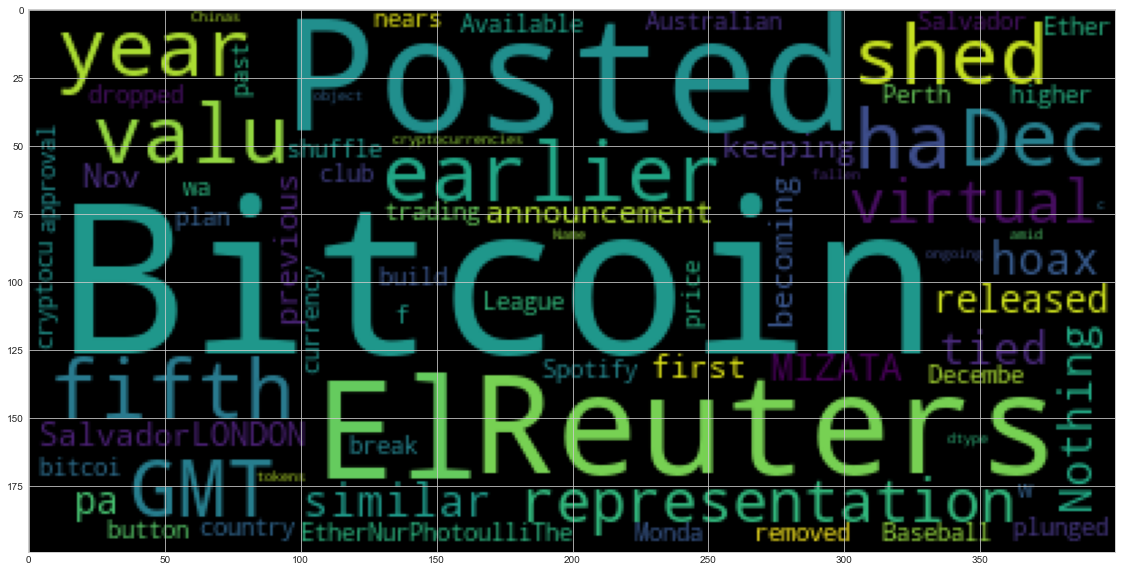

In [45]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(((str(btc_df['tokens']))))
plt.imshow(btc_wc)

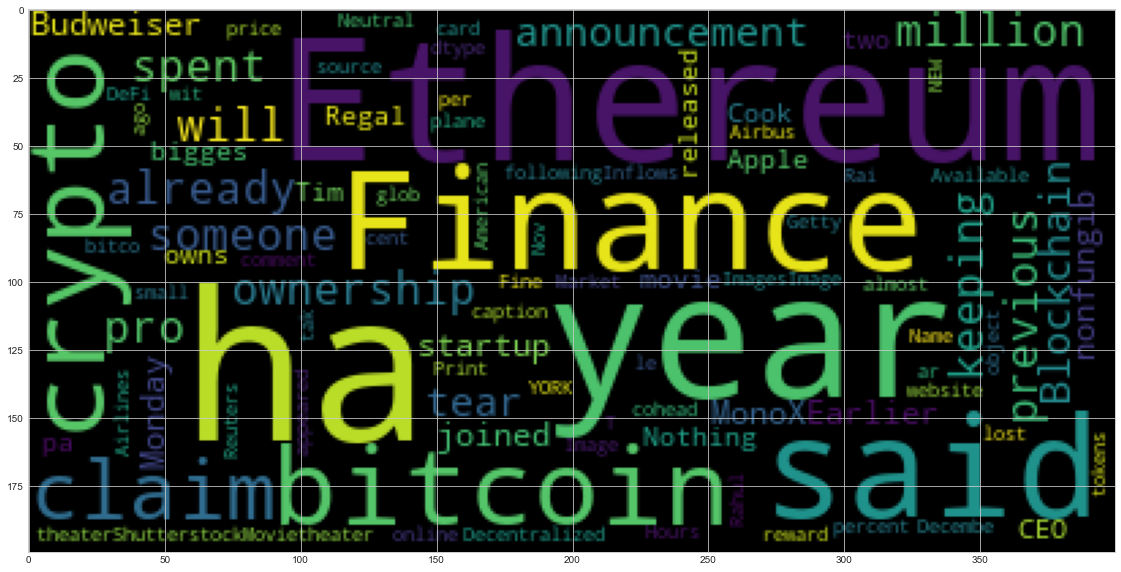

In [46]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(((str(eth_df['tokens']))))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [47]:
import spacy
from spacy import displacy

In [48]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [49]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [50]:
# Concatenate all of the Bitcoin text together
btc_texts = btc_df['text'].str.cat()

In [51]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_texts)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [52]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [54]:
# List all Entities
print([ent.text for ent in btc_doc.ents if ent.label_])

['earlier this year', 'Verge', 'Vox Media', 'Thiago Prudencio/S', 'this year', '99', '1', 'OnePlus', 'El Salvador', 'LONDON', 'Nov 22', 'Reuters', 'El Salvador', 'first', 'Bitcoin City', '$1 billion', 'Nayib Bukele', 'AMC', 'first', 'El Salvador', 'first', 'Bitcoin City', '99', 'December 13th', 'Ear 1', 'Nothings Ear 1', 'earlier this year', 'Adele', '30', 'NurPhoto', 'ETF', '>Bloomberg', 'first', 'ETF', '7%', 'Monday', 'morning', 'around $66,105', '3%', '4,722', 'over 9%', '+756', '4', 'Reuters', '8.4%', '49,228.82', '20:01 GMT', 'Saturday', '4,514.87', '28.7%', '3', 'Reuters', '5.5%', '53,435.9', '22:04 GMT', 'Friday', '3,112.06', '22.6%', 'fifth', 'Saturday', 'nearly a billion dollars', 'fifth', 'Saturday', 'nearly a billion dollars', 'Baseball League', 'Perth Heat', 'first', 'Hea', 'October 19, 2021', 'REUTERS', 'Edgar SuDec 4', 'Reuters', '9.29%', '48,752.15', 'GMT', '68,000', '$5k\r\n', 'CoinGecko', 'more than $3 trillion', 'El Salvador', 'first', 'Bitcoin City', '$1 billion', 'N

---

### Ethereum NER

In [55]:
# Concatenate all of the Ethereum text together
eth_texts = eth_df['text'].str.cat()

In [56]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_texts)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [57]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [58]:
# List all Entities
print([ent.text for ent in eth_doc.ents if ent.label_])

['this year', 'Australian Geoffrey Huntley', 'One', '13', 'the Official Edition of the Constitution', 'Sothebys\r\n', 'last Thursday', 'night', 'ConstitutionDAO', 'AMC', 'this year', 'this year', 'Mark Cuban', 'MonoX Finance', 'Wednesday', 'stole $31 million', 'Monday', 'Budweiser', 'first', 'hundreds of dollars', 'this year', '99', '1', 'OnePlus', 'two', 'Jordan Mansfield', 'JPMorgan', 'Tim Cook', "The New York Times'", 'Tuesday', 'Regal Cinemas', 'more than 500', 'dozens', '99', 'December 13th', 'Ear 1', 'Nothings Ear 1', 'earlier this year', '1-2%', 'DeFi', 'Ethereum', 'DeFi', 'almost 20 per cent', 'less than two weeks', 'Getty Images', 'US', 'Rai', 'Market Neutral', 'BlockTower Capital', 'Rahul Rai', 'Rahul Rai', 'nearly 20', 'TB', 'NFT', 'Nov 8', 'Reuters', 'a record $6.4 billion', 'this year', 'CoinShares', 'American Airlines', 'Airbus', 'A321-200', 'Los Angeles International', 'Los Angeles', 'California', 'U.S.', 'March 28, 2018', 'REUTERS', 'Mike Blake/File', 'Nov 16', 'Reute']

---